<h1 style='text-align: center;'> Chickens Are the Most Farmed Non-Aquatic Animal</h1>
<h2 style='text-align: center;'> And Why That Might Be</h2>
<h3 style='text-align: center;'> Creator: Kyle Rasmussen</h3>

## Table of Contents

##### 1. Introduction

##### 2. Code
    1. Importation
    
    2. Initial Cleaning and Creating of Data Frames
    
    3. Data Visulizations
##### 3. Body

##### 4. Conclusion

##### 5. Sources

## Introduction

&emsp;Chickens are the most farmed animal whether you look at the amount killed per year or a more fair representation
of tons of meat produced per year. In this notebook I will go over just how many chickens are killed and my opinion on why that is.<br><br>
Note: If you are not interested in the code section, skip to body.

## Code

### Importation

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

Importing Data

In [2]:
slaughter_per_year=pd.read_csv("animals-slaughtered-for-meat.csv")
meat_per_animal=pd.read_csv("global-meat-production-by-livestock-type.csv")
protein_effiency=pd.read_csv("protein-efficiency-of-meat-and-dairy-production.csv")
feed_required=pd.read_csv("feed-required-to-produce-one-kilogram-of-meat-or-dairy-product.csv")
land_required=pd.read_csv("land-use-protein.csv")

### Initial Cleaning and Crating of Data Frames

Tons of Meat per Animal

In [3]:
meat_per_animal = meat_per_animal[meat_per_animal["Entity"]=="World"]
meat_per_animal=meat_per_animal.rename(columns={'Meat, game | 00001163 || Production | 005510 || tonnes': "Game",
                                                'Meat, horse | 00001097 || Production | 005510 || tonnes': "Horse",
                                                'Meat, sheep and goat | 00001807 || Production | 005510 || tonnes': "Sheep and Goat",
                                                'Meat, camel | 00001127 || Production | 005510 || tonnes': "Camel",
                                                'Meat, beef and buffalo | 00001806 || Production | 005510 || tonnes': 'Beef and Buffalo',
                                                'Meat, pig | 00001035 || Production | 005510 || tonnes': 'Pig',
                                                'Meat, poultry | 00001808 || Production | 005510 || tonnes': 'Chicken'
                                               })
meat_per_animal_melt=pd.melt(meat_per_animal, id_vars=["Entity", "Year"], value_vars=["Game", "Horse", "Sheep and Goat", "Camel", "Beef and Buffalo", "Pig", "Chicken"])

Amount of Animals Slaughtered per Year

In [4]:
slaughter_per_year = slaughter_per_year.rename(columns={"Meat of cattle with the bone, fresh or chilled | 00000867 || Producing or slaughtered animals | 005320 || animals": "Cattle",
                   "Meat, goat | 00001017 || Producing or slaughtered animals | 005320 || animals": "Goat",
                   "Meat, chicken | 00001058 || Producing or slaughtered animals | 005321 || animals": "Chicken",
                   "Meat, turkey | 00001080 || Producing or slaughtered animals | 005321 || animals": "Turkey",
                   "Meat, pig | 00001035 || Producing or slaughtered animals | 005320 || animals": "Pig",
                   "Meat, lamb and mutton | 00000977 || Producing or slaughtered animals | 005320 || animals": "Lamb",
                   "Meat, duck | 00001069 || Producing or slaughtered animals | 005321 || animals": "Duck"
                  })
slaughter_per_year["Sum"] = slaughter_per_year[["Cattle", "Goat", "Chicken", "Turkey", "Pig", "Lamb", "Duck"]].sum(axis=1)

world_df=slaughter_per_year[slaughter_per_year["Entity"] == "World"]

melt_df=pd.melt(slaughter_per_year, id_vars=["Entity", "Year"], value_vars=["Cattle", "Goat", "Chicken", "Turkey", "Pig", "Lamb", "Duck"]) 

world_melt_df=pd.melt(world_df, id_vars=["Year"], value_vars=["Cattle", "Goat", "Chicken", "Turkey", "Pig", "Lamb", "Duck"])

world_melt_df_2021=world_melt_df[world_melt_df["Year"] == 2021]

Protein Efficiency

In [5]:
protein_effiency=protein_effiency.rename(columns={"Protein feed conversion efficiency (Alexander et al. (2016))": "Protein Efficiency"})
protein_effiency.drop(index=[1, 5], inplace=True)

Feed Required

In [6]:
feed_required=feed_required.rename(columns={"Feed conversion ratio (Alexander et al. (2016))": "Feed Required"})
feed_required.drop(index=[0, 2, 6], inplace=True)

Land Required

In [7]:
land_required=land_required.rename(columns={"Land use per 100g protein (Poore & Nemecek, 2018)": "Land Use"})
land_required.drop(index=[0, 1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 24, 26, 27, 28, 29, 30, 31], inplace=True)

### Data Visualizations

In [8]:
def line_plot_animals_slaughtered():
    fig, ax = plt.subplots()
    plt.title('Animals Slaughtered per Year')
    plt.xlabel('Year')
    plt.ylabel('Animals Slaughtered in Billions')
    ax=sns.lineplot(data=world_df, x="Year", y="Sum", label="Sum of Animals")
    ax=sns.lineplot(data=world_df, x="Year", y="Chicken", label="Chickens")
    ax.grid()
    plt.show()

In [9]:
def bar_plot_animals_slaughtered():
    fig, ax = plt.subplots()
    ax=sns.barplot(data=world_melt_df[world_melt_df["Year"] == 2021], x="variable", y="value")
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    plt.title('Animals Slaughtered in 2021')
    plt.xlabel('Animal')
    plt.ylabel('Animals Slaughtered in Billions')

In [10]:
def pie_chart_animals_slaughtered():
    data=[world_melt_df_2021["value"].iloc[0:2].sum()+world_melt_df_2021["value"].iloc[3:7].sum(), world_melt_df_2021["value"].iloc[2]]
    keys="Everything Else", "Chickens"
    fig, ax = plt.subplots()
    ax.pie(data, labels=keys, autopct='%1.1f%%', explode=(0, 0.1))
    plt.title('Percentages of Animals killed in 2021')
    plt.show

In [11]:
def line_plot_tons():
    fig, ax = plt.subplots()
    plt.stackplot(meat_per_animal["Year"],
                  meat_per_animal['Chicken'],
                  meat_per_animal['Pig'],
                  meat_per_animal['Beef and Buffalo'],
                  meat_per_animal['Sheep and Goat'],
                  meat_per_animal['Camel'],
                  meat_per_animal['Horse'],
                  meat_per_animal['Game'],
                  labels=['Chicken', 'Pig', 'Beef and Buffalo', 'Sheep and Goat', 'Camel', 'Horse', 'Game'])
    plt.legend(loc='upper left')
    plt.title('Tons of Animal Meat Produced per Year')
    plt.xlabel('Year')
    plt.ylabel('Tons in Hundreds of Millions')
    plt.show()


In [12]:
def bar_plot_tons():
    fig, ax = plt.subplots()
    ax=sns.barplot(data=meat_per_animal_melt[meat_per_animal_melt["Year"] == 2021], x="variable", y="value")
    ax.set_axisbelow(True)
    ax.yaxis.grid(color='gray', linestyle='dashed')
    plt.title('Tons of Meat per Animal in 2021')
    plt.xlabel('Animal')
    plt.ylabel('Tons in Hundreds of Millions')
    plt.xticks(rotation=45)

In [13]:
def bar_plot_protein():
    fig, ax = plt.subplots()
    ax=sns.barplot(protein_effiency, x="Entity", y="Protein Efficiency")
    ax.bar_label(ax.containers[0], fmt='%.2f%%')
    plt.title("Percentage of Protein Inputs to Outputs")
    plt.xlabel('Animal')
    plt.ylabel('Percentage')

In [14]:
def bar_plot_feed_required():
    fig, ax = plt.subplots()
    ax=sns.barplot(feed_required, x='Entity', y='Feed Required')
    plt.title("Feed Required to Produce 1 kg of Meat")
    plt.xlabel('Animal')
    plt.ylabel('kg of feed')
    ax.bar_label(ax.containers[0], fmt='%.1f')

In [15]:
def bar_plot_land_required():
    fig, ax = plt.subplots()
    ax=sns.barplot(land_required, x='Entity', y='Land Use')
    plt.title("Land Required per 100 grams of Protein")
    plt.xlabel('Animal')
    plt.ylabel('Land m^2')
    ax.bar_label(ax.containers[0], fmt='%.0f')

## Body

### Context

&emsp;Firstly I am going to provide some context on just how many chickens are farmed per year. I will provide a few graphs showing the overall numbers and relations.

&emsp;This first graph is a bar chart of the amount animals killed per year per animal in 2021. This graph shows just how many chickens were killed in relation to other animals. In 2021 approximately 7.5 billion chickens were killed with the next highest being ducks with .5 billion

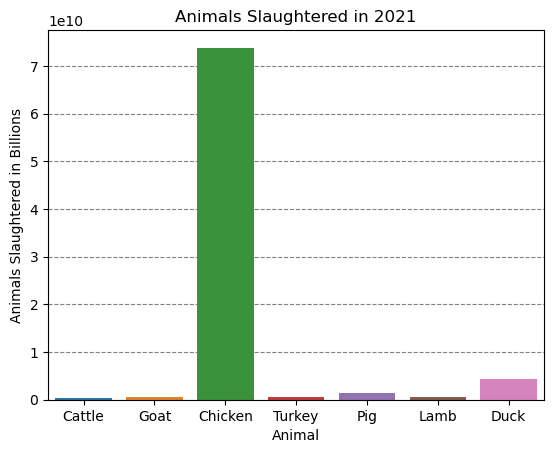

In [16]:
bar_plot_animals_slaughtered()

&emsp;This next graph is a pie chart with two sections with one section being the amount of chickens killed and the other being the six other animals from the previous graph combined. This shows that over 90 percent of all animals killed every year are chickens. This graph shows that over 90% of the animals killed in 2021 for meat were chickens.

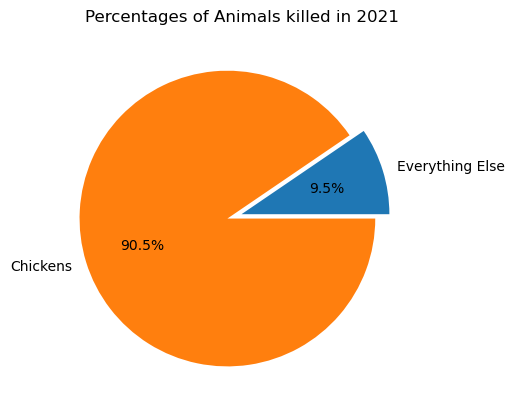

In [17]:
pie_chart_animals_slaughtered()

&emsp;You might be thinking that this is not as fair as a representation as it could be because chickens are quite small so killing them only gives a fraction of the meat say a cow would. That is fair point but even when you look at the amount of meat produced in tons, the animal who produces the most is chickens.

&emsp;This next graph is a graph of tons of meat produced per animal per year. This graph shows that Chickens are the still the most farmed in this regard.

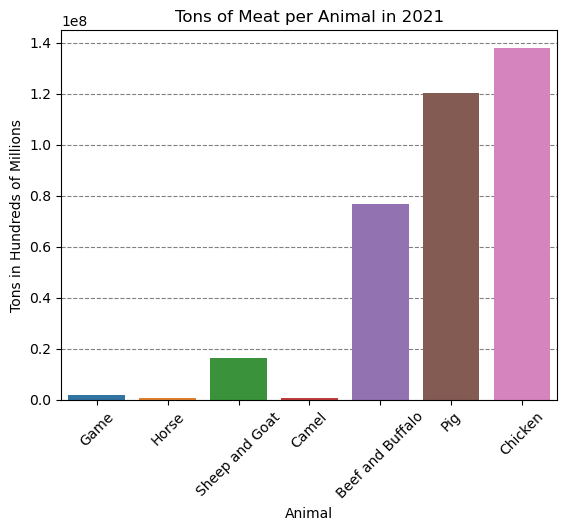

In [18]:
bar_plot_tons()

&emsp;That graph shows that chickens are the most farmed but it definitely shows a less extreme drop off, but something else though that must be considered is the increase per year. This next graph shows how many tons of meat produced per animal per year. This graph shows that chickens used to not be the most farmed, pigs and the combined beef and buffalo used to be above chickens. it also shows that the gap between chickens and the next highest animals has been increasing.

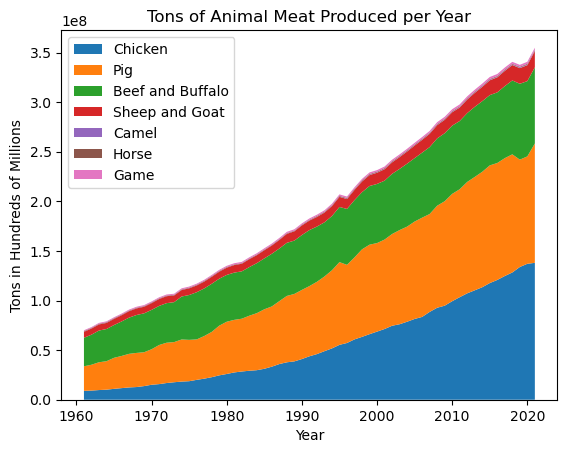

In [19]:
line_plot_tons()

### Why I think chickens are the most farmed

&emsp;We now have seen that regardless of the metric you use to determine which animal is the most farmed, chickens are the most. There are many reasons I believe that chickens are the most farmed animal, but I will highlight three reasons that I think are extremely influential. These three reasons are Feed Required, Protein Efficiency, and Land Required.

1. Feed Required

&emsp;The first reason I'll go over is feed required. The animal that requires the least amount of feed to produce one kilogram of meat is chickens. This bar chart shows how many kg of feed is required to produce a kg of meat. It shows that chickens require the least amount and that their is a large margin between chickens and the other animals.

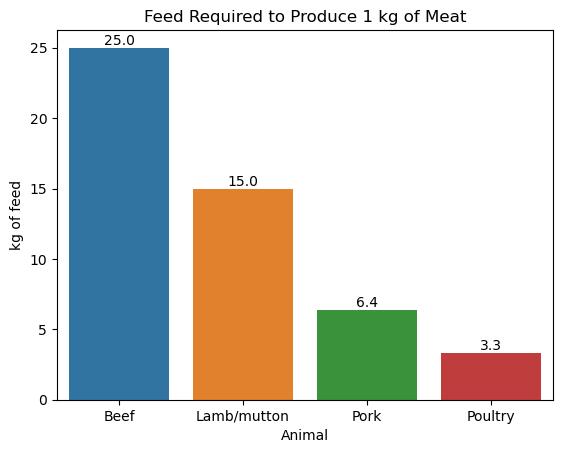

In [20]:
bar_plot_feed_required()

2. Protein Efficiency

&emsp;The second reason I'll go over, which has some similarities to the first reason, is that chickens are the most efficient at converting protein inputs to outputs. This next graph shows the percentage of protein that is conserved in meat from the feed. In this graph we see that chickens are more that two times as efficient as the next animal.

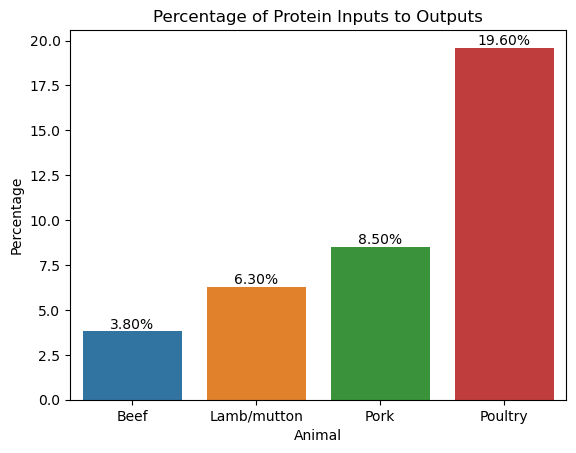

In [21]:
bar_plot_protein()

3. Land Required

&emsp;The third reason I'll go over, and what I think is the most influential, is the land Required. This next graph shows how many meters squared of land is required to produce 100 grams of protein. In this graph we see a few things, we see that the animal that requires the least amount of land is chickens, and that there is a huge drop of from beef, lamb, and mutton to pigs and chickens.

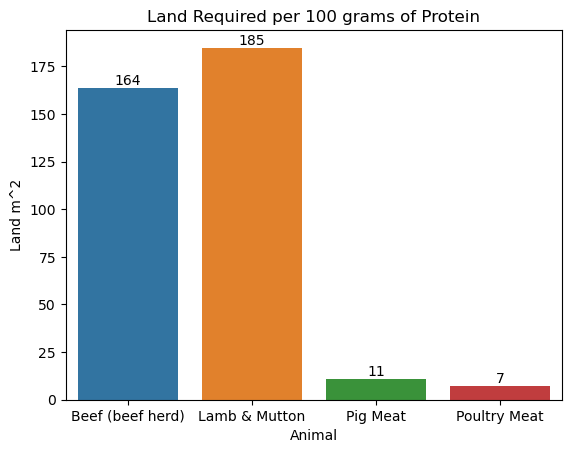

In [22]:
bar_plot_land_required()

## Conclusion

&emsp;Chickens are the most farmed non-aquatic animal. Whether you look at the amount killed or tons produced chickens are the most farmed. There are many reasons this might be the case in my opinion. I highlighted three main reasons why I think this is the case: Feed Required, Protein Efficiency, and Land Required. Chickens in each of these statistics perform the best, and pretty handily in most of them. This is why in my opinion they are the most farmed.
<br><br>
&emsp;Chickens used to not be the most farmed, they used to be third, behind pigs and the combined value of beef and buffalo. Now as stated earlier chickens are the most farmed, and looking at the trend it seems as we might only see this gap increase. 
<br><br>
&emsp;Something else of note. Pigs were second in each of these three statistics and they ended up being the second most farmed animal.

## Sources

All of my data sets were gathered through Our World In Data

https://ourworldindata.org/